## [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning)

The decision tree is an old, but still relevant nonlinear learning algorithm. The leaves of the tree represent distinct subsets of the training data. The other nodes compare a given attribute to a threshold value (e.g. is the body temperature > 37 °C). The branches starting from the node are associated with the two possible outcomes of the comparison.

<img src="../_img/decision_tree.jpg" width="400" align="left">

In this notebook, we will prepare the simplest version of the decision tree called [decision stump](https://en.wikipedia.org/wiki/Decision_stump), and we will test it on the Boston Housing data set. Moreover, we will explore the capabilities of scikit-learn's decision tree algorithm.

<img src="../_img/decision_stump.png" width="500" align="left">

**Exercise 2**: Implement the training of the decision stump regressor from scratch, and measure the model's root mean squared error (RMSE) on the full Boston Housing data set!

In [1]:
# Loading the data.
import pandas as pd
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df = pd.read_csv('housing_data.txt', delim_whitespace=True, names=names)
X = df[df.columns[:-1]].values # input matrix
y = df['MEDV'].values          # target vector

In [2]:
X.shape

(506, 12)

In [3]:
y.shape

(506,)

In [4]:
# Training algorithm.
import numpy as np

n, d = X.shape

sse_min = np.inf

for j in range(d): # iterate over all feature
    x = X[:,j] # select j.th column
    
    # sort x and y by x
    idxs = x.argsort()
    x_sorted = x[idxs]
    y_sorted = y[idxs]
    
    # find optimal threshold value
    for i in range(n-1):
        t = (x_sorted[i] + x_sorted[i+1]) /2
        yhat_L = y_sorted[:(i+1)].mean() # preduction for left branch
        yhat_R = y_sorted[(i+1):].mean() # preduction for left branch
        sse_L = ((y_sorted[:(i+1)] - yhat_L)**2).sum()
        sse_R = ((y_sorted[(i+1):] - yhat_R)**2).sum()
        sse = sse_L + sse_R # sum of sequared errors
        # instead of re-computing SSE, updating it would be more efficiant
        if sse < sse_min:
            sse_min = sse
            t_opt = t
            j_opt = j
            print(j, t, sse)

0 0.007690000000000001 42714.138495049505
0 0.01001 42654.06214285715
0 0.01306 42607.60066733068
0 0.013354999999999999 42487.76150099801
0 0.014065 42237.84195247638
0 0.014355 42153.999678714856
0 0.014700000000000001 42111.73079365079
0 0.015195 41739.21143434343
0 0.016235 41403.70269905533
0 0.017435 41349.519812763305
0 0.01824 41236.26263646922
0 0.01958 41205.95119132654
0 0.020319999999999998 40890.95242258652
0 0.02182 40635.159448559665
0 0.023425 40556.32548257241
0 0.03393 40547.17303427895
0 0.035235 40380.59639339103
0 0.035809999999999995 40254.02162255965
0 0.03637 40253.174434710054
0 0.037215 40116.550764971194
0 0.038195 40053.84481361776
0 0.04158 40050.55321587302
0 0.060615 40026.656188803965
0 0.06128 39928.78982113821
0 0.061399999999999996 39665.01313689411
0 0.06874 39608.649885609964
0 0.068935 39463.265595959594
0 0.06908 39343.75913705584
0 0.06962 39265.912307865525
0 0.070175 39210.16856426781
0 0.078805 39155.07983894646
0 0.07891000000000001 38989.805

In [5]:
j_opt, t_opt, sse_min

(5, 6.941, 23376.74038861689)

**Exercise 3**: Repeat the previous experiment using scikit-learn!

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
cl = DecisionTreeRegressor(max_depth=1)
cl.fit(X,y)

DecisionTreeRegressor(max_depth=1)

In [8]:
# Internal parameters of the trained model (.tree_.{feature, threshold, value})
print(cl.tree_.feature)
print(cl.tree_.threshold)
print(cl.tree_.value)

[ 5 -2 -2]
[ 6.94099998 -2.         -2.        ]
[[[22.53280632]]

 [[19.93372093]]

 [[37.23815789]]]


**Execrice 4**: Apply 3-fold cross-validation!

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

re = DecisionTreeRegressor(max_depth=1)
cv = KFold(3, random_state=42, shuffle=True)

scores = []
for tr, te in cv.split(X):
    re.fit(X[tr], y[tr])
    yhat = re.predict(X)
    rmse = (mean_squared_error(y[te], yhat[te]))**0.5
    scores.append(rmse)
    
np.mean(scores)

7.435013307929704

In [10]:
def evaluate(re, X, y):
    cv = KFold(3, random_state=42, shuffle=True)
    scores = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        rmse = (mean_squared_error(y[te], yhat[te]))**0.5
        scores.append(rmse)
    return np.mean(scores)

In [11]:
evaluate(DecisionTreeRegressor(max_depth=1), X, y)

7.4350133079297045

In [12]:
def evaluate(re, X, y):
    cv = KFold(3, random_state=42, shuffle=True)
    scores_te = []
    scores_tr = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        scores_tr.append((mean_squared_error(y[tr], yhat[tr]))**0.5)
        scores_te.append((mean_squared_error(y[te], yhat[te]))**0.5)
    return np.mean(scores_tr), np.mean(scores_te)

**Exercise 5:** Determine what maximal depth gives the lowest RMSE!

In [13]:
# loop over different max_depth values...
n = 30
rmse_te = dict()
rmse_tr = dict()

for i in range(n):
    a,b = evaluate(DecisionTreeRegressor(max_depth=i+1), X, y)
    rmse_tr[i+1] = a
    rmse_te[i+1] = b

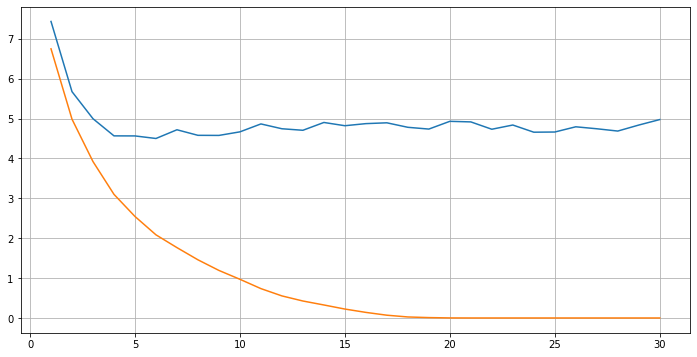

In [14]:
# plot training and test RMSE as a function of max_depth
# select the max_depth that gives the lowest test RMSE

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(list(rmse_te.keys()), list(rmse_te.values()))
plt.plot(list(rmse_tr.keys()), list(rmse_tr.values()))
plt.grid(True)

<AxesSubplot: xlabel='max_depth'>

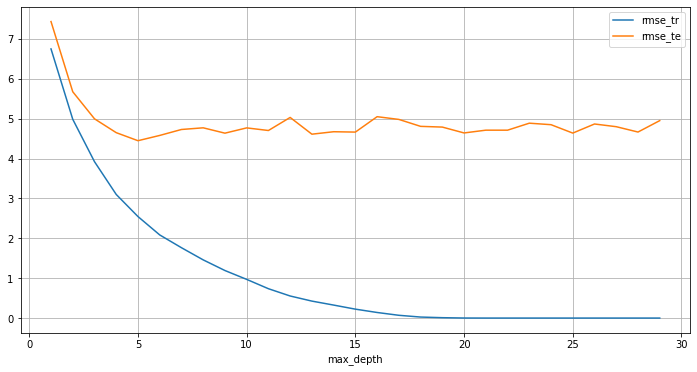

In [15]:
# Professor solution
res = []
for max_depth in range(1, 30):
    rmse_tr, rmse_te = evaluate(DecisionTreeRegressor(max_depth=max_depth), X, y)
    res.append({
        'max_depth': max_depth,
        'rmse_tr': rmse_tr,
        'rmse_te': rmse_te
    })

df_res = pd.DataFrame(res).set_index('max_depth')
df_res.plot(figsize=(12, 6), grid=True)

In [16]:
# Optimal max_depth.
df_res['rmse_te'].idxmin()

5

**Exercise 6**: Train a decision tree of depth 3 and visualize the trained model!

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'RM <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.25, 0.625, 'LSTAT <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.125, 0.375, 'DIS <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.0625, 0.125, 'squared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.1875, 0.125, 'squared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.375, 0.375, 'CRIM <= 6.992\nsquared_error = 19.276\nsamples = 175\nvalue = 14.956'),
 Text(0.3125, 0.125, 'squared_error = 11.391\nsamples = 101\nvalue = 17.138'),
 Text(0.4375, 0.125, 'squared_error = 14.674\nsamples = 74\nvalue = 11.978'),
 Text(0.75, 0.625, 'RM <= 7.437\nsquared_error = 79.729\nsamples = 76\nvalue = 37.238'),
 Text(0.625, 0.375, 'CRIM <= 7.393\nsquared_error = 41.296\nsamples = 46\nvalue = 32.113'),
 Text(0.5625, 0.125, 'squared_error = 20.111\nsamples = 43\nvalue = 33.349'),
 Text(0.6875, 0.125, 'squared_error = 9.307\nsamples = 3\nvalue =

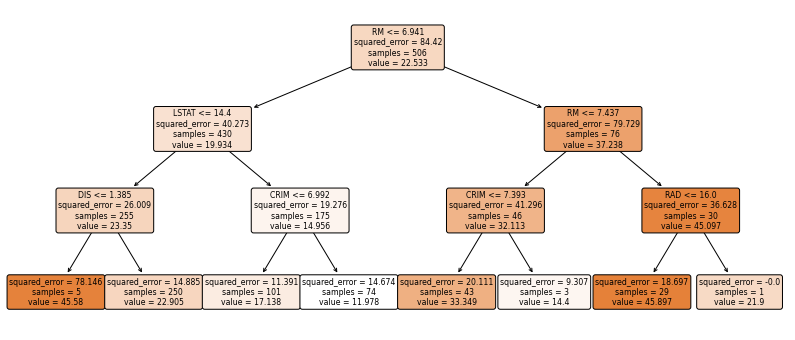

In [18]:
re = DecisionTreeRegressor(max_depth=3)
re.fit(X ,y)
plt.figure(figsize=(14, 6))
plot_tree(re, rounded=True, filled=True, feature_names=names)


In [19]:
# Number of parameters in the tree.
(re.tree_.feature >= 0).sum() * 2

14

In [20]:
# Total size of the set
X.shape[0] * (X.shape[1]+1)

6578

In [21]:
re.tree_.threshold

array([ 6.94099998, 14.4000001 ,  1.38484997, -2.        , -2.        ,
        6.99237013, -2.        , -2.        ,  7.43700004,  7.39342499,
       -2.        , -2.        , 16.        , -2.        , -2.        ])

In [22]:
re.tree_.feature

array([ 5, 11,  7, -2, -2,  0, -2, -2,  5,  0, -2, -2,  8, -2, -2],
      dtype=int64)

## Decision Trees for Classification

- Decision trees can also be applied to classification problems.


- The necessary modification is that instead of sum of squared error, a different split criterion should be applied (e.g. misclassification count, [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), [information gain](https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain)), and the leaf predictions should be changed to class probabilities.


- Decision trees can handle multiclass problems too.

**Exercise 7**: Apply a decision tree classifier for the Wisconsin Breast Cancer data set! Use 5-fold cross-validation! The evaluation metric should be the ratio of correct classifications. Determine the maximal depth that gives the highest accuracy! Compare the best decision tree against logistic regression!

In [23]:
# Load the data to DataFrame.
import pandas as pd
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
    'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('wisconsin_data.txt', sep=',', names=names, na_values='?')
df['Bare_Nuclei'].fillna(0, inplace=True)
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [24]:
# Input matrix.
X = df[names[1:-1]].values
X.shape

(699, 9)

In [25]:
# Target vector.
y = df['Class'].values // 2 -1

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [27]:
# Model evaluation function.
def evaluate(cl, X, y):
    cv = KFold(5, random_state=42, shuffle=True)

    scores_tr = []
    scores_te = []
    for tr, te in cv.split(X):
        cl.fit(X[tr], y[tr])
        yhat = cl.predict(X)
        scores_tr.append(accuracy_score(y[tr], yhat[tr]))
        scores_te.append(accuracy_score(y[te], yhat[te]))

    return np.mean(scores_tr), np.mean(scores_te)


In [28]:
evaluate(DecisionTreeClassifier(max_depth=1), X, y)

(0.9288250702785585, 0.8941212744090441)

<AxesSubplot: xlabel='max_depth'>

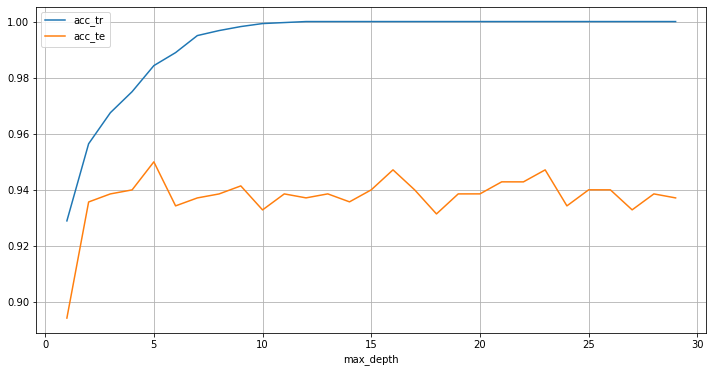

In [29]:
# Trying different max_depth values.
res = []
for max_depth in range(1, 30):
    acc_tr, acc_te = evaluate(DecisionTreeClassifier(max_depth=max_depth), X, y)
    res.append({
        'max_depth': max_depth,
        'acc_tr': acc_tr,
        'acc_te': acc_te
    })

df_res = pd.DataFrame(res).set_index('max_depth')
df_res.plot(figsize=(12, 6), grid=True)

In [30]:
# Optimal max_depth.
df_res['acc_te'].idxmax()

5

In [31]:
df_res.loc[8]

acc_tr    0.996783
acc_te    0.938448
Name: 8, dtype: float64

In [32]:
# Comparison to logistic regression.

from sklearn.linear_model import LogisticRegression
evaluate(LogisticRegression(), X, y)

(0.9703136979299771, 0.9627954779033916)

In [33]:
# Another compartion with Linear regression

# Loading the data.
import pandas as pd
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df = pd.read_csv('../_data/housing_data.txt', delim_whitespace=True, names=names)
X = df[df.columns[:-1]].values # input matrix
y = df['MEDV'].values          # target vector

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evaluate(re, X, y):
    cv = KFold(3, random_state=42, shuffle=True)

    scores_tr = []
    scores_te = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        scores_tr.append(mean_squared_error(y[tr], yhat[tr])**0.5)
        scores_te.append(mean_squared_error(y[te], yhat[te])**0.5)

    return np.mean(scores_tr), np.mean(scores_te)

evaluate(DecisionTreeRegressor(max_depth=1), X, y)

(6.748971341330223, 7.4350133079297045)

<AxesSubplot: xlabel='max_depth'>

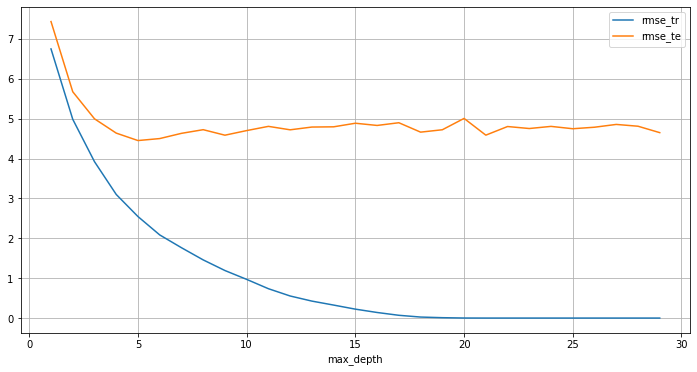

In [35]:
res = []
for max_depth in range(1, 30):
    rmse_tr, rmse_te = evaluate(DecisionTreeRegressor(max_depth=max_depth), X, y)
    res.append({
        'max_depth': max_depth,
        'rmse_tr': rmse_tr,
        'rmse_te': rmse_te
    })

df_res = pd.DataFrame(res).set_index('max_depth')
df_res.plot(figsize=(12, 6), grid=True)

In [36]:
# Optimal max_depth.
df_res['rmse_te'].idxmin()

5

In [37]:
df_res.loc[df_res['rmse_te'].idxmin()]

rmse_tr    2.545337
rmse_te    4.451221
Name: 5, dtype: float64

In [38]:
# Comparison against ridge regression.
from sklearn.linear_model import Ridge
evaluate(Ridge(), X, y)

(4.736093991350386, 4.8792312907094795)

## Decision Trees vs. Linear Models

Decision trees
- ...are insensitive to the scale of the input features 😀
- ...are easier to explain 😀
- ...can learn complex patterns 😀
- ...do not handle sparse data efficiently ☹️
- ...tend to overfit more ☹️